# Preprocessing Concepts

### Below is a sample where we just print the center, left, right camera views, all data pre-processing will be made to work here before we train the network

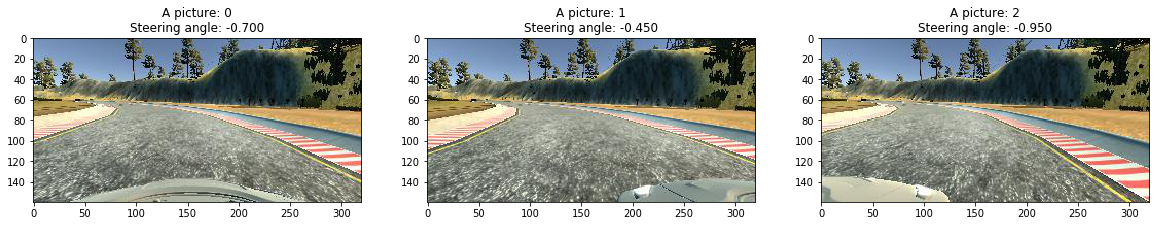

In [23]:
import csv, cv2
import matplotlib.pyplot as plt
import numpy as np

STEER_CORRECTION = .25

data = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        data.append(line)

images = []
steering_angles = []
for i in range(1):
    data_point = data[i]
    name = './data/IMG/'+ data_point[0].split('\\')[-1]
    left = './data/IMG/'+ data_point[1].split('\\')[-1]
    righ = './data/IMG/'+ data_point[2].split('\\')[-1]
    
    center_image = cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB)
    left_image  = cv2.cvtColor(cv2.imread(left), cv2.COLOR_BGR2RGB)
    right_image = cv2.cvtColor(cv2.imread(righ), cv2.COLOR_BGR2RGB)
    center_angle = float(data_point[3])
    left_angle = float(data_point[3]) + STEER_CORRECTION
    righ_angle = float(data_point[3]) - STEER_CORRECTION
    images.extend( (center_image,left_image, right_image ) )
    steering_angles.extend( (center_angle, left_angle, righ_angle) )

plt.figure(figsize=(20, 25))
for i in range(3):
    plt.subplot(1, 3, i + 1)    
    title = "A picture: {0}\nSteering angle: {1:.3f}".format(i, steering_angles[i])
    plt.title(title, wrap=True)
    plt.imshow(images[i])

## Now that we have images, let's try to flip them

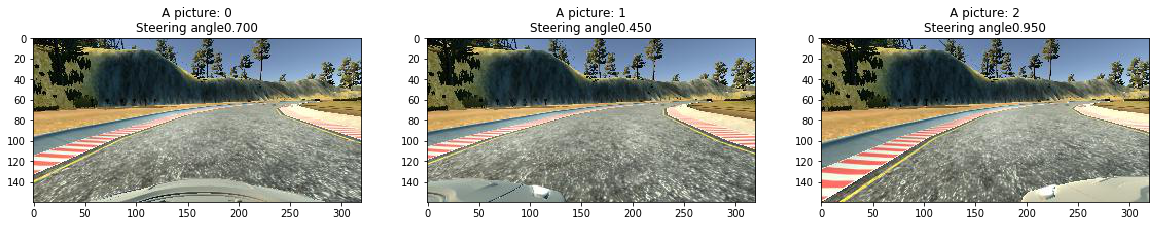

In [32]:
flipped_images = []
new_angles = []

for i in range(3):
    data_point = data[i]
    flipped = np.copy(np.fliplr(images[i]))   
    flipped_images.append(flipped)
    new_angles.append(-1*steering_angles[i])
    
plt.figure(figsize=(20, 25))
for i in range(3):
    plt.subplot(1, 3, i + 1)    
    title = "A picture: {0}\nSteering angle{1:.3f}".format(i, new_angles[i])
    plt.title(title, wrap=True)
    plt.imshow(flipped_images[i])